In [1]:
import sys
import os
import pandas as pd
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [3]:
# Aller au dossier racine du projet
project_root = os.path.abspath("..")  # Remonte au dossier principal du projet
src_path = os.path.join(project_root, "src")

# Ajouter le chemin src/ au path Python (évite les doublons)
if src_path not in sys.path:
    sys.path.append(src_path)

In [4]:
from ml_models.pipeline import run_model

model, X_train, df_stats = run_model('catboost  ',use_feature_engineering=True, use_bet_odds=True)

/Users/liem_nguyen/PycharmProjects/horse_racings/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   venue                63531 non-null  category
 1   config               63531 non-null  category
 2   surface              63531 non-null  category
 3   distance             63531 non-null  category
 4   going                63531 non-null  category
 5   horse_ratings        63531 non-null  category
 6   race_class           63531 non-null  category
 7   horse_id             63531 non-null  int64   
 8   horse_age            63531 non-null  int64   
 9   horse_country        63531 non-null  category
 10  horse_type           63531 non-null  category
 11  horse_rating         63531 non-null  category
 12  horse_gear           63531 non-null  category
 13  declared_weight      63531 non-null  float64 
 14  actual_weight        63531 non-null  int64   
 15  draw                 6353

In [5]:
df_stats = df_stats.reset_index()
df_stats.head(50)

,race_id,horse_id,won,y_predict,top_prediction,accuracy
0,5078,976,0,0.051661,0,False
1,5078,1598,0,0.006165,0,False
2,5078,1514,0,0.051435,0,False
3,5078,3673,0,0.027816,0,False
4,5078,627,1,0.181076,0,False
5,5078,1271,0,-0.030909,0,False
6,5078,833,0,0.107181,0,False
7,5078,3751,0,0.021615,0,False
8,5078,1918,0,0.494338,1,False
9,5078,1615,0,0.055649,0,False


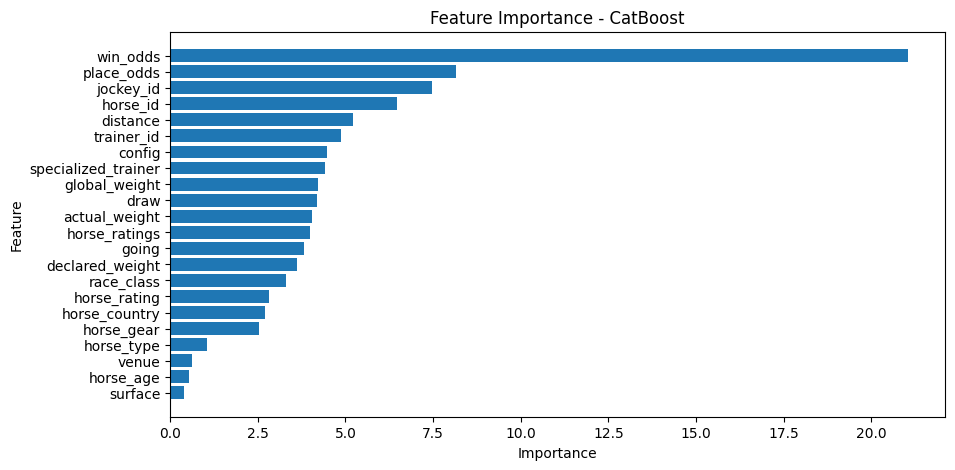

In [6]:
from metrics.feature_importance import plot_feature_importance

importance_df = plot_feature_importance(model, X_train)

test d'un modèle + simple (à faire)

## Winning strategies

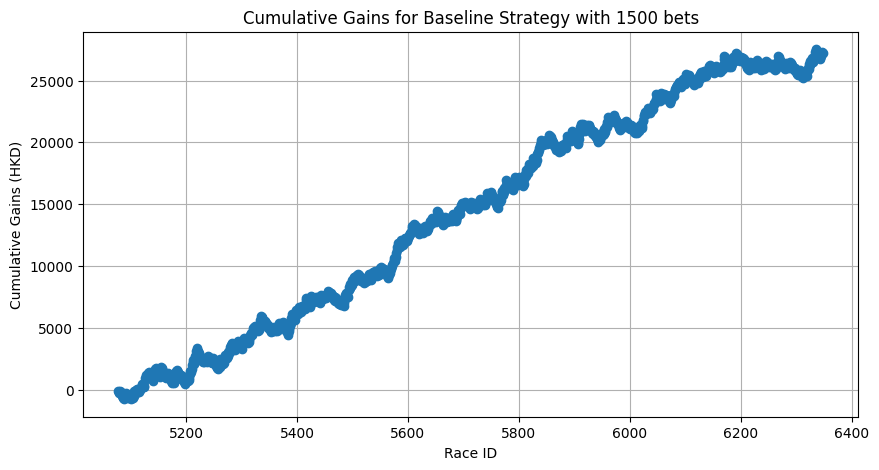

In [7]:
from data_processing.preprocess_data import fetch_winning_dividends
from investment_strategies.baseline_strategy import baseline_strategy
from visualization.plot_results import plot_cumulative_gains 

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = baseline_strategy(df, 100, i)
    plot_cumulative_gains(df, i, "Baseline Strategy")

au hasard

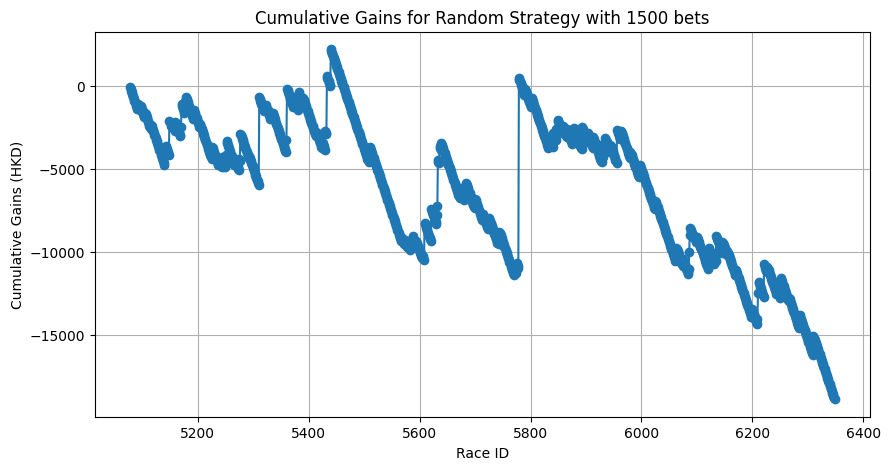

In [8]:
from investment_strategies.random_strategy import random_strategy

for i in [1500]:
    df = fetch_winning_dividends(df_stats)
    df = random_strategy(df, 100, i)

    plot_cumulative_gains(df, i, "Random Strategy")

critère de kelly

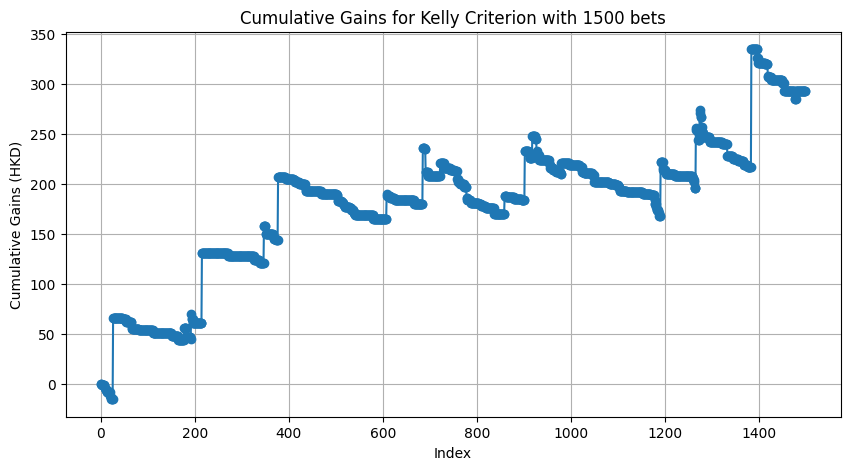

In [9]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.Kelly_criterion import kelly_criterion
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=False, single_bet_per_race=False)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

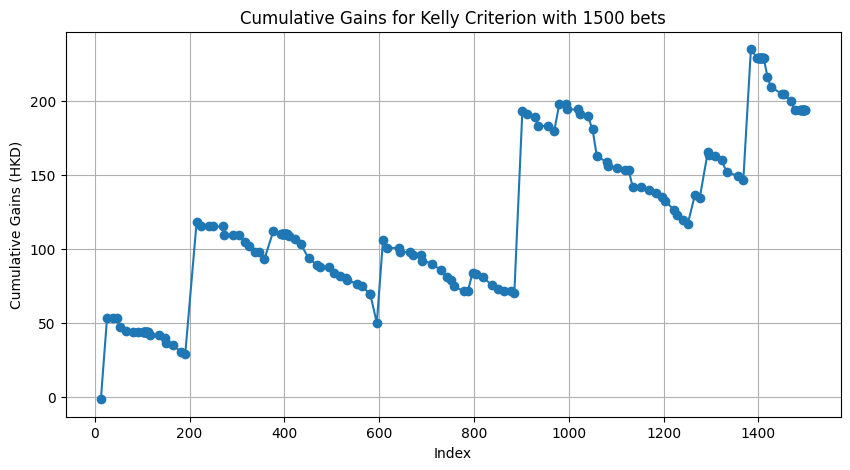

In [10]:
for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = kelly_criterion(df, 100, i, 0.01,calibrate_probabilities=True, single_bet_per_race=True)
    plot_cumulative_gains_per_horse(df, i, "Kelly Criterion")

Kelly fonctionne moins bien car Kelly récompense l'utilisateur si la probabilité de victoire de chaque cheval est vraiment pertinente, donc elle nécessite une précision quanti dingue car elle fonde le montant à parier sur cette proba.

critère de thorp & zembia

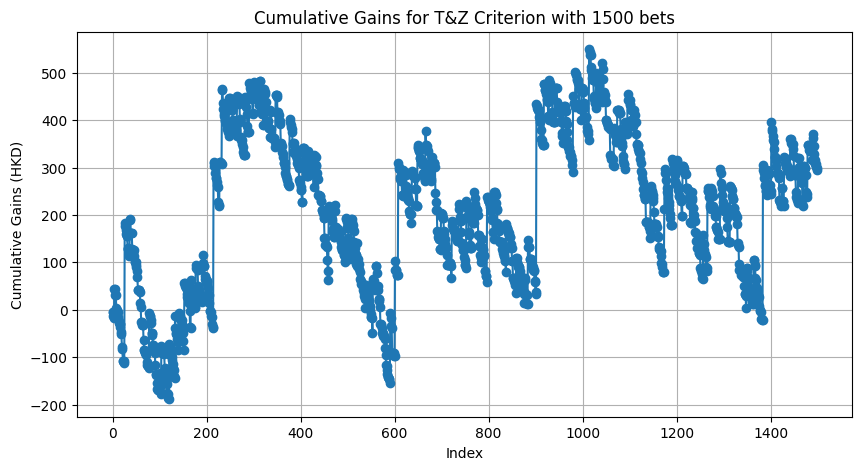

,race_id,horse_id,won,y_predict,win_dividend1,win_odds,num_horses,bet_fraction,bet_amount,gains,cumulative_gains
0,5078,976,0,0.051661,4.40,15.0,14,0.052171,5.217124,-5.217124,-5.217124
1,5078,1598,0,0.006165,4.40,99.0,14,0.000000,0.000000,-0.000000,-5.217124
2,5078,1514,0,0.051435,4.40,25.0,14,0.081333,8.133254,-8.133254,-13.350378
3,5078,3673,0,0.027816,4.40,34.0,14,0.036188,3.618830,-3.618830,-16.969208
4,5078,627,1,0.181076,4.40,4.4,14,0.138777,13.877691,61.061839,44.092631
...,...,...,...,...,...,...,...,...,...,...,...
1495,5196,459,0,0.069029,13.55,12.0,12,0.084249,8.424917,-8.424917,307.775644
1496,5196,4307,0,-0.003539,13.55,99.0,12,0.000000,0.000000,-0.000000,307.775644
1497,5196,3525,0,0.066331,13.55,11.0,12,0.068382,6.838219,-6.838219,300.937425
1498,5196,4275,0,0.014418,13.55,67.0,12,0.021446,2.144619,-2.144619,298.792806


In [11]:
from data_processing.preprocess_data import fetch_winning_dividends_per_prediction
from investment_strategies.thorp_zembia_criterion import thorp_zembia_criterion 
from visualization.plot_results import plot_cumulative_gains_per_horse

for i in [1500]:
    df = fetch_winning_dividends_per_prediction(df_stats)
    df = thorp_zembia_criterion(df, 100, i, min_kelly=0.01)
    plot_cumulative_gains_per_horse(df, i, "T&Z Criterion")
df


Pareil, si mon modèle est pas opti, il y aura trop de différences entre le y_predict et les odds, donc l'optimisation quanti va mal se faire

## Model comparison

In [12]:
from ml_models.evaluate import compare_models


model_configs = [
        ('catboost', True, True),
        ('catboost', True, False),
        ('linear_regression', True, True),
        ('linear_regression', True, False)
    ]

compare_models(model_configs=model_configs)

<class 'pandas.core.frame.DataFrame'>
Index: 63531 entries, 0 to 5077
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   venue                63531 non-null  category
 1   config               63531 non-null  category
 2   surface              63531 non-null  category
 3   distance             63531 non-null  category
 4   going                63531 non-null  category
 5   horse_ratings        63531 non-null  category
 6   race_class           63531 non-null  category
 7   horse_id             63531 non-null  int64   
 8   horse_age            63531 non-null  int64   
 9   horse_country        63531 non-null  category
 10  horse_type           63531 non-null  category
 11  horse_rating         63531 non-null  category
 12  horse_gear           63531 non-null  category
 13  declared_weight      63531 non-null  float64 
 14  actual_weight        63531 non-null  int64   
 15  draw                 6353

AttributeError: 'tuple' object has no attribute 'merge'

test du lag